C:\Users\darre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\darre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


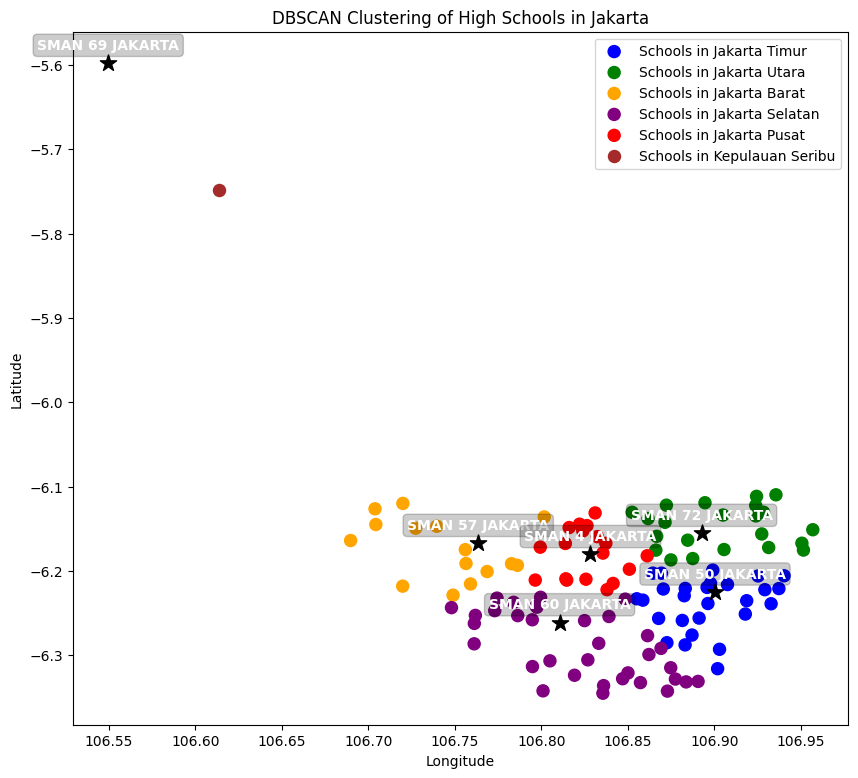

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Dataset yang akan digunakan
dataset = "https://raw.githubusercontent.com/darrellv14/ADD_Final-Project_2023/main/smanjktdarrell.csv"

# Mengimport CSV
df = pd.read_csv(dataset)


df['Latitude'] = pd.to_numeric(df['lintang'])
df['Longitude'] = pd.to_numeric(df['bujur'])


centroids_location = {
    'Jakarta Timur': [106.900378, -6.224840],
    'Jakarta Utara': [106.892657, -6.155218],
    'Jakarta Barat': [106.763571, -6.167165],
    'Jakarta Selatan': [106.810578, -6.261276],
    'Jakarta Pusat': [106.828421, -6.180371],
    'Kepulauan Seribu': [106.549749, -5.597827]
}

# Menentukan lokasi centroid untuk masing-masing daerah
# Mengkonversi CSV ke datatype numerik

# Menambahkan kolom 'Latitude' dan 'Longitude' untuk centroid
# Menambahkan kolom 'Area' ke DataFrame utama
# Menentukan area untuk setiap sekolah berdasarkan centroid terdekat

df_centroids = pd.DataFrame(list(centroids_location.values()), columns=['Longitude', 'Latitude'])
df_centroids['Area'] = list(centroids_location.keys())

df['Area'] = None

for i, school in df.iterrows():
    school_location = [school['Longitude'], school['Latitude']]
    distances = [(area, ((school_location[0] - centroid[0])**2 + (school_location[1] - centroid[1])**2)**0.5) 
                 for area, centroid in centroids_location.items()]
    nearest_area = min(distances, key=lambda x: x[1])[0]
    df.at[i, 'Area'] = nearest_area


X = df[['Latitude', 'Longitude']]
X = StandardScaler().fit_transform(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.37, min_samples=7)
labels = dbscan.fit_predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Menentukan warna untuk setiap area (centroid)
colors = {'Jakarta Timur': 'blue', 'Jakarta Utara': 'green', 'Jakarta Barat': 'orange', 'Jakarta Selatan': 'purple',
           'Jakarta Pusat': 'red', 'Kepulauan Seribu': 'brown'}
df_centroids['Color'] = df_centroids['Area'].map(colors)
df['Area_Color'] = df['Area'].map(colors)

# Menentukan sekolah terdekat dengan masing-masing centroid
df_centroids['Nearest_School'] = None
for i, centroid in df_centroids.iterrows():
    centroid_location = [centroid['Longitude'], centroid['Latitude']]
    schools_in_area = df[df['Area'] == centroid['Area']]
    distances = cdist([centroid_location], schools_in_area[['Longitude', 'Latitude']], 'euclidean')
    nearest_school_index = distances.argmin()
    nearest_school_name = schools_in_area.iloc[nearest_school_index]['sekolah']
    df_centroids.at[i, 'Nearest_School'] = nearest_school_name

# Visualize the clusters (for 2D data)
plt.figure(figsize=(10, 9))
# Assign colors based on the cluster labels and area
for area, color in colors.items():
    area_schools = df[df['Area'] == area]
    centroid = df_centroids[df_centroids['Area'] == area]
    nearest_school = centroid['Nearest_School'].values[0]
    plt.scatter(area_schools['Longitude'], area_schools['Latitude'], s=75, c=area_schools['Area_Color'], label=f'Schools in {area}')
    plt.scatter(centroid['Longitude'], centroid['Latitude'], marker='*', c='black', s=150)
    plt.annotate(nearest_school, (centroid['Longitude'], centroid['Latitude']),
             textcoords="offset points", xytext=(0,10), c='white',
             ha='center', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.2))
plt.title('DBSCAN Clustering of High Schools in Jakarta')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Save the DataFrame to a CSV file
df.to_csv('clustered_data_with_dbscan_and_colors.csv', index=False)


In [ ]:
# Calculate distances to each centroid and add to DataFrame
for i, centroid in df_centroids.iterrows():
    centroid_location = [centroid['Longitude'], centroid['Latitude']]
    df['Distance_to_' + centroid['Area']] = cdist([centroid_location], df[['Longitude', 'Ltude']], 'euclidean')[0]

# Export the DataFrame to a CSV file
df.to_csv('distances_to_centroids.csv', index=False)

distances = pd.read_csv('distances_to_centroids.csv')
distances

,sekolah,lintang,bujur,Latitude,Longitude,Area,Cluster,Area_Color,Distance_to_Jakarta Timur,Distance_to_Jakarta Utara,Distance_to_Jakarta Barat,Distance_to_Jakarta Selatan,Distance_to_Jakarta Pusat,Distance_to_Kepulauan Seribu
0,SMAN 1 JAKARTA,-6.1672,106.8373,-6.1672,106.8373,Jakarta Pusat,0,red,0.085447,0.056639,0.073729,0.097798,0.015884,0.637865
1,SMAN 10 JAKARTA,-6.1462,106.8264,-6.1462,106.8264,Jakarta Pusat,0,red,0.107968,0.066868,0.066235,0.116159,0.034231,0.614206
2,SMAN 100 JAKARTA,-6.2294,106.8826,-6.2294,106.8826,Jakarta Timur,3,blue,0.018353,0.074861,0.134317,0.078761,0.073070,0.713915
3,SMAN 101 JAKARTA,-6.2180,106.7199,-6.2180,106.7199,Jakarta Barat,-1,orange,0.180608,0.183811,0.067018,0.100475,0.114860,0.643091
4,SMAN 102 JAKARTA,-6.1671,106.9506,-6.1671,106.9506,Jakarta Utara,-1,green,0.076526,0.059149,0.187029,0.168746,0.122898,0.696242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,SMAN 97 JAKARTA,-6.3422,106.8010,-6.3422,106.8010,Jakarta Selatan,-1,purple,0.153783,0.208239,0.178992,0.081489,0.164136,0.785632
113,SMAN 98 JAKARTA,-6.3324,106.8573,-6.3324,106.8573,Jakarta Selatan,7,purple,0.115866,0.180675,0.189968,0.085097,0.154748,0.796357
114,SMAN 99 JAKARTA,-6.3425,106.8729,-6.3425,106.8729,Jakarta Selatan,-1,purple,0.120826,0.188321,0.206628,0.102379,0.168120,0.811766
115,SMAN RAGUNAN JAKARTA,-6.3054,106.8269,-6.3054,106.8269,Jakarta Selatan,-1,purple,0.109036,0.163947,0.152051,0.047046,0.125038,0.759916


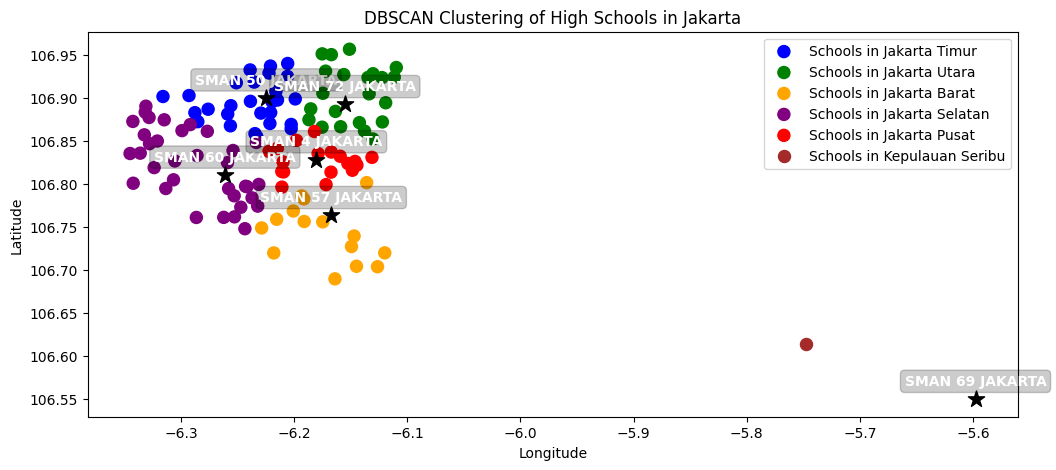

                        sekolah  lintang     bujur  Latitude  Longitude  \
0                SMAN 1 JAKARTA  -6.1672  106.8373   -6.1672   106.8373   
1               SMAN 10 JAKARTA  -6.1462  106.8264   -6.1462   106.8264   
2              SMAN 100 JAKARTA  -6.2294  106.8826   -6.2294   106.8826   
3              SMAN 101 JAKARTA  -6.2180  106.7199   -6.2180   106.7199   
4              SMAN 102 JAKARTA  -6.1671  106.9506   -6.1671   106.9506   
..                          ...      ...       ...       ...        ...   
112             SMAN 97 JAKARTA  -6.3422  106.8010   -6.3422   106.8010   
113             SMAN 98 JAKARTA  -6.3324  106.8573   -6.3324   106.8573   
114             SMAN 99 JAKARTA  -6.3425  106.8729   -6.3425   106.8729   
115        SMAN RAGUNAN JAKARTA  -6.3054  106.8269   -6.3054   106.8269   
116  SMAN UNGGULAN M.H. THAMRIN  -6.3159  106.9019   -6.3159   106.9019   

                Area  Cluster Area_Color  Distance_to_Jakarta Timur  \
0      Jakarta Pusat        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from math import radians, sin, cos, sqrt, atan2

# URL dari Dataset CSV yang akan digunakan
dataset = "https://raw.githubusercontent.com/darrellv14/ADD_Final-Project_2023/main/smanjktdarrell.csv"

# Mengimport CSV
df = pd.read_csv(dataset)

# Mengkonversi CSV ke datatype numerik
df['Latitude'] = pd.to_numeric(df['lintang'])
df['Longitude'] = pd.to_numeric(df['bujur'])

# Menentukan lokasi centroid untuk masing-masing daerah
centroids_location = {
    'Jakarta Timur': [106.900378, -6.224840],
    'Jakarta Utara': [106.892657, -6.155218],
    'Jakarta Barat': [106.763571, -6.167165],
    'Jakarta Selatan': [106.810578, -6.261276],
    'Jakarta Pusat': [106.828421, -6.180371],
    'Kepulauan Seribu': [106.549749, -5.597827]
}

# Menambahkan kolom 'Latitude' dan 'Longitude' untuk centroid
df_centroids = pd.DataFrame(list(centroids_location.values()), columns=['Longitude', 'Latitude'])
df_centroids['Area'] = list(centroids_location.keys())

# Menambahkan kolom 'Area' ke DataFrame utama
df['Area'] = None

# Menentukan area untuk setiap sekolah berdasarkan centroid terdekat
for i, school in df.iterrows():
    school_location = [school['Longitude'], school['Latitude']]
    distances = [(area, ((school_location[0] - centroid[0]) ** 2 + (school_location[1] - centroid[1]) ** 2) ** 0.5)
                 for area, centroid in centroids_location.items()]
    nearest_area = min(distances, key=lambda x: x[1])[0]
    df.at[i, 'Area'] = nearest_area

# Standardize the features
X = df[['Latitude', 'Longitude']]
X = StandardScaler().fit_transform(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=3)
labels = dbscan.fit_predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Menentukan warna untuk setiap area (centroid)
colors = {'Jakarta Timur': 'blue', 'Jakarta Utara': 'green', 'Jakarta Barat': 'orange', 'Jakarta Selatan': 'purple',
          'Jakarta Pusat': 'red', 'Kepulauan Seribu': 'brown'}
df_centroids['Color'] = df_centroids['Area'].map(colors)
df['Area_Color'] = df['Area'].map(colors)

# Fungsi haversine untuk menghitung jarak
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius Bumi dalam kilometer
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    jarak = R * c
    return jarak

# Find the nearest school for each centroid
df_centroids['Nearest_School'] = None
for i, centroid in df_centroids.iterrows():
    centroid_location = [centroid['Longitude'], centroid['Latitude']]
    schools_in_area = df[df['Area'] == centroid['Area']]

    # Skip if no schools in the area
    if schools_in_area.empty:
        continue

    distances = cdist([centroid_location], schools_in_area[['Longitude', 'Latitude']], 'euclidean')
    nearest_school_index = distances.argmin()
    nearest_school_name = schools_in_area.iloc[nearest_school_index]['sekolah']
    df_centroids.at[i, 'Nearest_School'] = nearest_school_name

# Calculate distances to each centroid and add to DataFrame in kilometers
for i, centroid in df_centroids.iterrows():
    centroid_location = [centroid['Longitude'], centroid['Latitude']]
    df['Distance_to_' + centroid['Area']] = df.apply(
        lambda row: haversine(row['Latitude'], row['Longitude'], centroid['Latitude'], centroid['Longitude']),
        axis=1
    )

# Visualize the clusters (for 2D data)
plt.figure(figsize=(12, 5))
# Assign colors based on the cluster labels and area
for area, color in colors.items():
    area_schools = df[df['Area'] == area]
    centroid = df_centroids[df_centroids['Area'] == area]
    nearest_school = centroid['Nearest_School'].values[0]
    plt.scatter(area_schools['Latitude'], area_schools['Longitude'], s=75, c=area_schools['Area_Color'],
                label=f'Schools in {area}')
    plt.scatter(centroid['Latitude'], centroid['Longitude'], marker='*', c='black', s=150)
    plt.annotate(nearest_school, (centroid['Latitude'], centroid['Longitude']),
                 textcoords="offset points", xytext=(0, 10), c='white',
                 ha='center', fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.2))
plt.title('DBSCAN Clustering of High Schools in Jakarta')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Save the DataFrame to a CSV file
df.to_csv('clustered_data_with_dbscan_and_distances_in_km.csv', index=False)

# Export the DataFrame to a CSV file
df.to_csv('distances_to_centroids_in_km.csv', index=False)

distances = pd.read_csv('distances_to_centroids_in_km.csv')
print(distances)
